In [3]:
import pandas as pd
import seaborn as sns

In [4]:
rejected_drop = pd.read_csv('Rejected_DropNAs.csv')

In [5]:
rejected_drop.shape

(8977809, 5)

In [6]:
rejected_drop.isnull().sum()                 #No Null Values

Risk_Score           0
DI                   0
Loan Type            0
Employment Length    0
Accepted             0
dtype: int64

In [7]:
rejected_drop.dtypes

Risk_Score           float64
DI                   float64
Loan Type             object
Employment Length     object
Accepted               int64
dtype: object

In [8]:
rejected_drop.describe()

,Risk_Score,DI,Accepted
count,8.977809e+06,8.977809e+06,8977809.0
mean,6.272171e+02,1.697738e+00,0.0
std,8.990980e+01,1.778247e+02,0.0
min,0.000000e+00,-1.000000e-02,0.0
25%,5.910000e+02,9.040000e-02,0.0
50%,6.360000e+02,2.053000e-01,0.0
75%,6.740000e+02,3.623000e-01,0.0
max,9.900000e+02,5.000003e+05,0.0


In [9]:
rejected_drop.head(2)

,Risk_Score,DI,Loan Type,Employment Length,Accepted
0,693.0,0.1,Wedding Covered but No Honeymoon,4 years,0
1,703.0,0.1,Consolidating Debt,< 1 year,0


In [10]:
r = rejected_drop.drop(['Loan Type'], axis=1)
r

,Risk_Score,DI,Employment Length,Accepted
0,693.0,0.1000,4 years,0
1,703.0,0.1000,< 1 year,0
2,715.0,0.1000,1 year,0
3,698.0,0.3864,< 1 year,0
4,509.0,0.0943,< 1 year,0
...,...,...,...,...
8977804,681.0,0.5515,< 1 year,0
8977805,531.0,0.3131,< 1 year,0
8977806,590.0,0.4126,< 1 year,0
8977807,686.0,0.1026,< 1 year,0


In [11]:
accepted_drop = pd.read_csv('Accepted_DropNAs.csv')

In [12]:
accepted_drop.shape

(2113644, 5)

In [13]:
accepted_drop.isnull().sum()

Risk_Score           0
DI                   0
Loan Type            0
Employment Length    0
Accepted             0
dtype: int64

In [14]:
accepted_drop.dtypes

Risk_Score           float64
DI                   float64
Loan Type             object
Employment Length     object
Accepted               int64
dtype: object

In [15]:
accepted_drop.describe()

,Risk_Score,DI,Accepted
count,2.113644e+06,2.113644e+06,2113644.0
mean,7.004048e+02,1.858311e-01,1.0
std,3.272013e+01,1.181010e-01,0.0
min,6.120000e+02,-1.000000e-02,1.0
25%,6.770000e+02,1.186000e-01,1.0
50%,6.920000e+02,1.773000e-01,1.0
75%,7.170000e+02,2.432000e-01,1.0
max,8.475000e+02,9.990000e+00,1.0


In [16]:
accepted_drop.head(2)

,Risk_Score,DI,Loan Type,Employment Length,Accepted
0,677.0,0.0591,Debt Consolidation,10+ years,1
1,717.0,0.1606,Business Loan,10+ years,1


In [17]:
a = accepted_drop.drop(['Loan Type'], axis=1)
a

,Risk_Score,DI,Employment Length,Accepted
0,677.0,0.0591,10+ years,1
1,717.0,0.1606,10+ years,1
2,697.0,0.1078,10+ years,1
3,787.0,0.1706,10+ years,1
4,697.0,0.2537,3 years,1
...,...,...,...,...
2113639,667.0,0.1961,7 years,1
2113640,697.0,0.3494,10+ years,1
2113641,707.0,0.1275,9 years,1
2113642,662.0,0.1830,6 years,1


In [18]:
combo = pd.concat([a, r], axis=0, ignore_index=True)
combo

,Risk_Score,DI,Employment Length,Accepted
0,677.0,0.0591,10+ years,1
1,717.0,0.1606,10+ years,1
2,697.0,0.1078,10+ years,1
3,787.0,0.1706,10+ years,1
4,697.0,0.2537,3 years,1
...,...,...,...,...
11091448,681.0,0.5515,< 1 year,0
11091449,531.0,0.3131,< 1 year,0
11091450,590.0,0.4126,< 1 year,0
11091451,686.0,0.1026,< 1 year,0


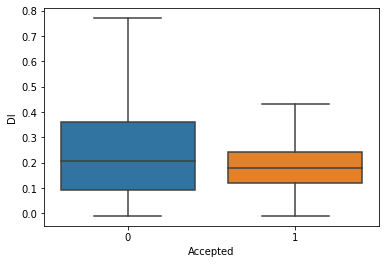

In [19]:
sns.boxplot(data=combo, y='DI', x='Accepted', showfliers=False);

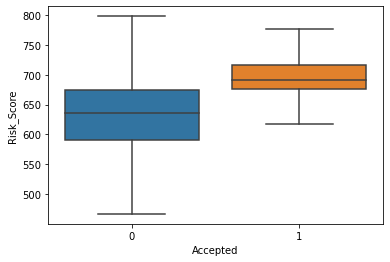

In [20]:
sns.boxplot(data=combo, y='Risk_Score', x='Accepted', showfliers=False);

In [21]:
#Convert Employment Length to Ordinal Feature:

In [22]:
sorted(combo['Employment Length'].unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [23]:
emp_ordering = [
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'
 ]

In [24]:
def ordinal_encode(df, column, ordering):
    df[column] = df[column].apply(lambda x: ordering.index(x))

In [25]:
ordinal_encode(combo, 'Employment Length', emp_ordering)

In [26]:
combo

,Risk_Score,DI,Employment Length,Accepted
0,677.0,0.0591,10,1
1,717.0,0.1606,10,1
2,697.0,0.1078,10,1
3,787.0,0.1706,10,1
4,697.0,0.2537,3,1
...,...,...,...,...
11091448,681.0,0.5515,0,0
11091449,531.0,0.3131,0,0
11091450,590.0,0.4126,0,0
11091451,686.0,0.1026,0,0


In [27]:
combo.dtypes

Risk_Score           float64
DI                   float64
Employment Length      int64
Accepted               int64
dtype: object

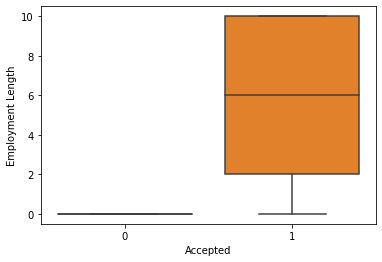

In [28]:
sns.boxplot(data=combo, y='Employment Length', x='Accepted', showfliers=False);

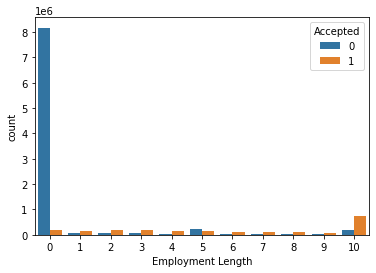

In [29]:
sns.countplot(data=combo, x='Employment Length', hue='Accepted');

In [30]:
y = combo['Accepted']
X = combo.drop('Accepted', axis=1)

In [31]:
X

,Risk_Score,DI,Employment Length
0,677.0,0.0591,10
1,717.0,0.1606,10
2,697.0,0.1078,10
3,787.0,0.1706,10
4,697.0,0.2537,3
...,...,...,...
11091448,681.0,0.5515,0
11091449,531.0,0.3131,0
11091450,590.0,0.4126,0
11091451,686.0,0.1026,0


In [32]:
X.shape

(11091453, 3)

In [33]:
X.columns

Index(['Risk_Score', 'DI', 'Employment Length'], dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_scaled

array([[ 0.4117828 , -0.00844142,  2.66841597],
       [ 0.8714152 , -0.00780699,  2.66841597],
       [ 0.641599  , -0.00813702,  2.66841597],
       ...,
       [-0.58791766, -0.00623187, -0.4889526 ],
       [ 0.51520009, -0.00816952, -0.4889526 ],
       [ 0.49221847, -0.00814952, -0.4889526 ]])

In [36]:
X = pd.DataFrame(X_scaled, columns=X.columns)
X

,Risk_Score,DI,Employment Length
0,0.411783,-0.008441,2.668416
1,0.871415,-0.007807,2.668416
2,0.641599,-0.008137,2.668416
3,1.675772,-0.007744,2.668416
4,0.641599,-0.007225,0.458258
...,...,...,...
11091448,0.457746,-0.005364,-0.488953
11091449,-1.265875,-0.006854,-0.488953
11091450,-0.587918,-0.006232,-0.488953
11091451,0.515200,-0.008170,-0.488953


In [37]:
y.shape

(11091453,)

In [38]:
y

0           1
1           1
2           1
3           1
4           1
           ..
11091448    0
11091449    0
11091450    0
11091451    0
11091452    0
Name: Accepted, Length: 11091453, dtype: int64

In [39]:
scaled_combo = pd.concat([X,y], axis=1)
scaled_combo

,Risk_Score,DI,Employment Length,Accepted
0,0.411783,-0.008441,2.668416,1
1,0.871415,-0.007807,2.668416,1
2,0.641599,-0.008137,2.668416,1
3,1.675772,-0.007744,2.668416,1
4,0.641599,-0.007225,0.458258,1
...,...,...,...,...
11091448,0.457746,-0.005364,-0.488953,0
11091449,-1.265875,-0.006854,-0.488953,0
11091450,-0.587918,-0.006232,-0.488953,0
11091451,0.515200,-0.008170,-0.488953,0


In [40]:
scaled_combo.to_csv('Combo_3_DropNAs.csv', index=False)